Index,Image,Group ID,Entity Name
0,,156839,height
1,,792578,width
2,,792578,height
3,,792578,depth
4,,792578,depth

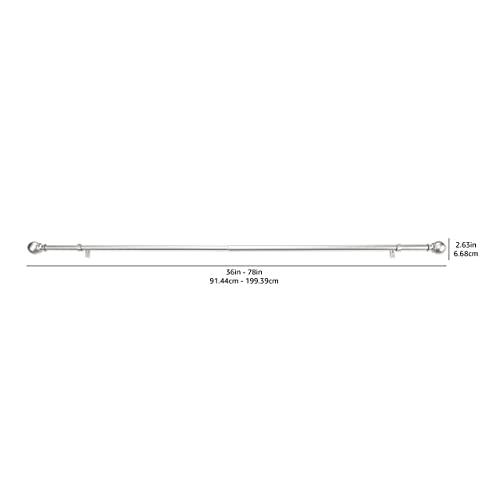
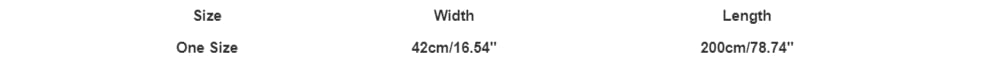
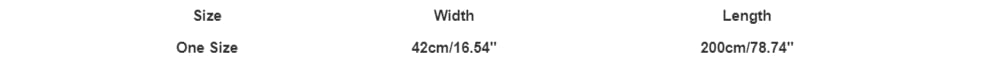
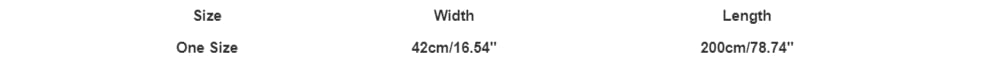
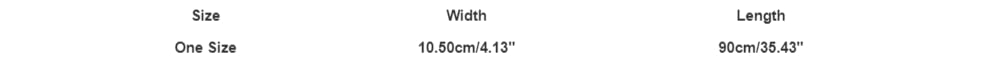

In [2]:
import pandas as pd
import requests
from IPython.display import display, HTML
import base64
from io import BytesIO

def fetch_and_display_dataset(csv_file, num_rows=5):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Function to fetch image and return as base64
    def fetch_image(url):
        try:
            response = requests.get(url)
            img = BytesIO(response.content)
            return base64.b64encode(img.getvalue()).decode()
        except:
            return ""

    # Apply the function to create a new column with image data
    df['image_data'] = df['image_link'].apply(fetch_image)

    # Create HTML table
    html = '''
    <table style="border-collapse: collapse;">
        <tr>
            <th style="border: 1px solid black; padding: 5px;">Index</th>
            <th style="border: 1px solid black; padding: 5px;">Image</th>
            <th style="border: 1px solid black; padding: 5px;">Group ID</th>
            <th style="border: 1px solid black; padding: 5px;">Entity Name</th>
        </tr>
    '''
    
    for _, row in df.head(num_rows).iterrows():
        html += '<tr>'
        html += f'<td style="border: 1px solid black; padding: 5px;">{row["index"]}</td>'
        if row["image_data"]:
            html += f'''
            <td style="border: 1px solid black; padding: 5px;">
                <a href="{row['image_link']}" target="_blank">
                    <img src="data:image/jpeg;base64,{row['image_data']}" width="100" style="cursor: pointer;">
                </a>
            </td>
            '''
        else:
            html += '<td style="border: 1px solid black; padding: 5px;">Image not available</td>'
        html += f'<td style="border: 1px solid black; padding: 5px;">{row["group_id"]}</td>'
        html += f'<td style="border: 1px solid black; padding: 5px;">{row["entity_name"]}</td>'
        html += '</tr>'
    
    html += '</table>'

    # Display the HTML table
    display(HTML(html))

# Usage
fetch_and_display_dataset('data-cross-section.csv', num_rows=5)